In [18]:
import cv2
import numpy as np

In [19]:
# Load Yolo
net = cv2.dnn.readNet(r"C:\Users\Sanika\Downloads\yolov3.weights", r"C:\Users\Sanika\yolov3.cfg")
classes = []
with open(r"C:\Users\Sanika\coco.names", 'r') as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [20]:
img = cv2.imread(r"C:\Users\Sanika\Downloads\bus.jpg")
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

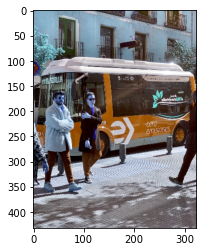

In [4]:
import matplotlib.pyplot as plt

plt.imshow(img)

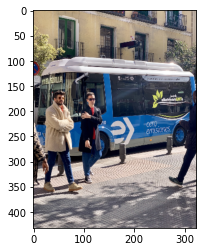

In [24]:
#Changing color to (When the image file is read with the OpenCV function imread() , the order of colors is BGR (blue, green, red). On the other hand, in Pillow, the order of colors is assumed to be RGB (red, green, blue). Therefore, if you want to use both the Pillow function and the OpenCV function, you need to convert BGR and RGB.)
img_1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_1)

In [25]:
# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0),swapRB=True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

In [26]:
# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [27]:
len(boxes)

24

In [28]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)


In [29]:
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 3, color, 3)




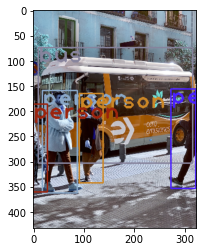

In [30]:
plt.imshow(img)

In [ ]:
cv2.imshow("Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()